# LEARNER, Auv Navigation and Multisensor Datafor Underwater Robotics

In [1]:
from ipyleaflet import Map, basemaps, basemap_to_tiles, Rectangle

import matplotlib.pylab as plt
import pandas as pd
import pathlib as pl

%matplotlib notebook

# Experimental area: Haig Fras survey area in the Celtic Sea

In [2]:
haig_fras_p = (50.35, -7.72%360)
haig_fras_bounds = ( (50.20, -7.52%360), (50.55, -7.92%360) )

data_folder = pl.Path('../../to-review/AYE/sample')

In [4]:
map_layer = basemap_to_tiles(basemaps.Esri.NatGeoWorldMap)

m = Map(layers=(map_layer, ), center=haig_fras_p, zoom=7)

rectangle = Rectangle(bounds=haig_fras_bounds)

m.add_layer(rectangle)

m

Map(center=[50.35, 352.28], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_…

## Reading MultiBeam Data

In [10]:
mbes_navigation_df = pd.read_csv(data_folder/'navigation.txt', sep=',')
mbes_navigation_df.head()

,Date,Time,Latitude,Longitude,Course,Heading,Speed
0,10/08/2015,20:07:09.374,50.354488,-7.720728,0.0,97.64,0.0
1,10/08/2015,20:07:09.972,50.354480,-7.720723,0.0,95.10,0.0
2,10/08/2015,20:07:10.399,50.354480,-7.720717,0.0,95.10,0.0
3,10/08/2015,20:07:10.931,50.354477,-7.720710,0.0,91.90,0.0
4,10/08/2015,20:07:11.558,50.354477,-7.720703,0.0,90.60,0.0


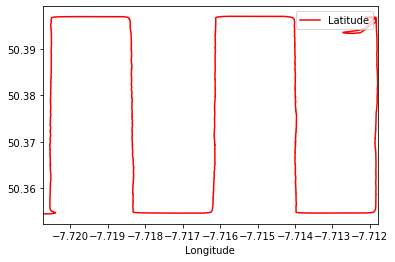

In [11]:
mbes_navigation_df.plot(x='Longitude', y='Latitude', color='r')

In [23]:
mbes_data_df = pd.read_csv(data_folder/'multi-beam-echosounder-index.csv', sep=',', low_memory=False)

In [24]:
mbes_data_df.head()

,Date,Time,Seconds,Latitude,Longitude,depth,altitude,Roll,Pitch,Heading,...,Veast14,Vnorth14,Vdown14,Verr14,Inten3_15,Inten15,Veast15,Vnorth15,Vdown15,Verr15
0,10-Aug-2015,16:30:00,-7958,50.333973,-7.711981,-0.421316,1000.000000,0.063879,-0.016162,0.083112,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10-Aug-2015,16:30:02,-7956,50.333973,-7.711983,-0.421316,1000.000000,0.031870,-0.023911,0.073164,...,NaN,NaN,NaN,NaN,0.000000,41.000000,NaN,NaN,NaN,NaN
2,10-Aug-2015,16:30:04,-7954,50.333973,-7.711986,-0.384176,1000.000000,-0.006109,-0.010786,0.067317,...,NaN,NaN,NaN,NaN,0.000000,41.000000,NaN,NaN,NaN,NaN
3,10-Aug-2015,16:30:06,-7952,50.333973,-7.711987,-0.421316,1000.000000,0.000227,0.009634,0.078348,...,NaN,NaN,NaN,NaN,0.000000,41.000000,NaN,NaN,NaN,NaN
4,10-Aug-2015,16:30:08,-7950,50.333973,-7.711989,-0.384464,1000.000000,0.037332,0.008186,0.092066,...,NaN,NaN,NaN,NaN,0.000000,41.000000,NaN,NaN,NaN,NaN


In [25]:
mbes_data_df.columns = mbes_data_df.columns.str.replace(' ','')

In [31]:
mbes_data_df.head()

,Date,Time,Seconds,Latitude,Longitude,depth,altitude,Roll,Pitch,Heading,...,Veast14,Vnorth14,Vdown14,Verr14,Inten3_15,Inten15,Veast15,Vnorth15,Vdown15,Verr15
0,10-Aug-2015,16:30:00,-7958,50.333973,-7.711981,-0.421316,1000.000000,0.063879,-0.016162,0.083112,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10-Aug-2015,16:30:02,-7956,50.333973,-7.711983,-0.421316,1000.000000,0.031870,-0.023911,0.073164,...,NaN,NaN,NaN,NaN,0.000000,41.000000,NaN,NaN,NaN,NaN
2,10-Aug-2015,16:30:04,-7954,50.333973,-7.711986,-0.384176,1000.000000,-0.006109,-0.010786,0.067317,...,NaN,NaN,NaN,NaN,0.000000,41.000000,NaN,NaN,NaN,NaN
3,10-Aug-2015,16:30:06,-7952,50.333973,-7.711987,-0.421316,1000.000000,0.000227,0.009634,0.078348,...,NaN,NaN,NaN,NaN,0.000000,41.000000,NaN,NaN,NaN,NaN
4,10-Aug-2015,16:30:08,-7950,50.333973,-7.711989,-0.384464,1000.000000,0.037332,0.008186,0.092066,...,NaN,NaN,NaN,NaN,0.000000,41.000000,NaN,NaN,NaN,NaN


In [32]:
nav_latitude = pd.to_numeric(mbes_data_df['Latitude'])

ValueError: Unable to parse string "            NaN" at position 1198

In [29]:
plt.plot(mbes_data_df['Longitude'].values, mbes_data_df['Latitude'].values)

Error in callback <function flush_figures at 0x11f9c16a8> (for post_execute):


KeyboardInterrupt: 

# References

- [1] [ipyleaflet](https://github.com/jupyter-widgets/ipyleaflet)
- [2] [ipyleaflet, API](https://ipyleaflet.readthedocs.io/en/latest/api_reference/rectangle.html)
- [3] [maps in jupyter](https://blog.jupyter.org/interactive-gis-in-jupyter-with-ipyleaflet-52f9657fa7a)
- [4] [geonotebook](https://github.com/OpenGeoscience/geonotebook)